# Niche detection using scimap's `spatial_count` and `spatial_cluster`

In [6]:
# Run this cell when making changes to editable packages
# e.g., scripts/utils
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
## Imports
import scimap as sm
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from sklearn.metrics import adjusted_rand_score
from scripts.utils.data_loading import *
from scripts.utils.niches import *
from scripts.utils.plotting.niches import *

In [ ]:
## Load data
# 3D nbrs view will be created from preprocessed 2D & 3D full data
radius = 20 # in um
sections_2to3 = np.arange(10,141,10)

adata2 = load_data_2D()
adata3_full = load_data_3D_full()

/home/gesa/.py_venv/scimap/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.

/home/gesa/.py_venv/scimap/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.

/home/gesa/.py_venv/scimap/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



## Run scimap

In [4]:
ks = [3,4,5,6] # number of clusters

kwargs_count = { 'phenotype':'ct_broad', 'x_coordinate':'x', 'y_coordinate':'y', 'method':'radius', 'radius':radius, 'verbose':False }
kwargs_cluster = {'method':'kmeans', 'random_state':42, 'verbose':False}

In [61]:
## 3D full data
sm.tl.spatial_count(adata3_full,  z_coordinate='z', **kwargs_count)
for k in ks:
    sm.tl.spatial_cluster(adata3_full, label=f'spatial_kmeans_{k}', k=k, **kwargs_cluster)

Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering


In [ ]:
## 3D nbrs view
# Init
adata3_nbrs = ad.AnnData( obs = adata2.obs.loc[ np.isin(adata2.obs['z'], sections_2to3),
                                               ['id','z','ct_broad','x','y']].copy()   )
adata3_nbrs.obs.rename({'z':'section'}, axis=1, inplace=True)

ptypes = adata3_full.uns['spatial_count'].columns.values
adata3_nbrs.uns['spatial_count'] = pd.DataFrame( columns=ptypes, index=adata3_nbrs.obs.index )

for section in adata2.obs['z'].unique(): #sections_2to3:
    # Subset & copy spatial count data
    ids = adata3_nbrs[ adata3_nbrs.obs['section']==section ].obs['id'].values
    subset = np.isin(adata3_full.obs['id'], ids)
    adata = adata3_full[ subset ].copy()
    adata.uns['spatial_count'] = adata3_full.uns['spatial_count'][subset]
    
    idx = adata.obs.reset_index(drop=False).set_index('id').loc[ids, 'index'].values
    adata3_nbrs.uns['spatial_count'].loc[ adata3_nbrs.obs['section']==section ] = adata.uns['spatial_count'].loc[ idx, ptypes].values
    
    # Cluster
    for k in ks:
        sm.tl.spatial_cluster(adata, label=f'spatial_kmeans_{k}', k=k, **kwargs_cluster)
        adata3_nbrs.obs.loc[ adata3_nbrs.obs['section']==section, f'spatial_kmeans_{k}'] = adata.obs.set_index('id').loc[ids, f'spatial_kmeans_{k}'].values # write to original adata object

Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clu

In [ ]:
## 2D data
# Init
ptypes = adata3_full.obs['ct_broad'].value_counts().index.values
adata2.uns['spatial_count'] = pd.DataFrame( columns=ptypes, index=adata2.obs.index )
for k in ks:
    adata2.obs[f'spatial_kmeans_{k}'] = '-1' # dtype str

# Calculate NBH composition & cluster per image
for z in adata2.obs['z'].unique():
    adata = adata2[ adata2.obs['z']==z ].copy() # subset to cluster independently per image
    
    sm.tl.spatial_count(adata,  z_coordinate=None, imageid='z', **kwargs_count)
    ptypes_valid = ptypes[ np.isin(ptypes, adata.uns['spatial_count'].columns) ]
    adata2.uns['spatial_count'].loc[adata.obs.index, ptypes_valid] = adata.uns['spatial_count'][ptypes_valid] # write to original adata object
    for k in ks:
        sm.tl.spatial_cluster(adata, label=f'spatial_kmeans_{k}', k=k, **kwargs_cluster)
        adata2.obs.loc[ adata2.obs['z']==z, f'spatial_kmeans_{k}'] = adata.obs[f'spatial_kmeans_{k}'] # write to original adata object
adata2.uns['spatial_count'].fillna(0, inplace=True) # caused by no lack of cells of this type

Kmeans clustering


/tmp/ipykernel_9486/3186611967.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2' '1' '1' ... '1' '2' '1']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Kmeans clustering


/tmp/ipykernel_9486/3186611967.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0' '3' '3' ... '3' '0' '3']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Kmeans clustering


/tmp/ipykernel_9486/3186611967.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['4' '0' '0' ... '0' '4' '0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Kmeans clustering


/tmp/ipykernel_9486/3186611967.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2' '0' '0' ... '0' '2' '0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clustering
Kmeans clu

## Assess results

### 3D data (full image)

In [27]:
# Reorder clusters (to match later plots)
adata3_full.obs.spatial_kmeans_4 = adata3_full.obs.spatial_kmeans_4.astype(int).map({2:0,1:2,0:1,3:3}).astype(str).astype('category')

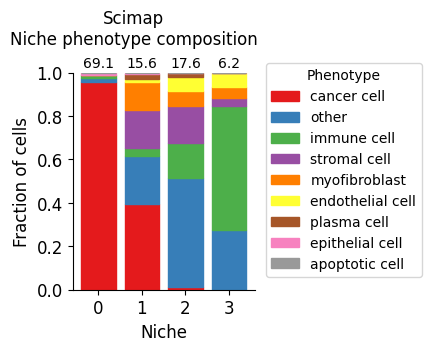

In [73]:
# Stacked barplot: phenotype composition of each niche
k = 4
niche = f'spatial_kmeans_{k}'

pt_order = list(adata3_full.obs.value_counts('ct_broad').index)

fig, ax = plt.subplots(figsize=(2.5,3.4), sharey=True, layout='constrained')
plt.suptitle(f'Scimap\nNiche phenotype composition')
niche_pt_composition_subplot(
    adata3_full.obs[niche],
    adata3_full.obs['ct_broad'],
    ax=ax,
    sort_niches_by=np.arange(k).astype(str),
    sort_phenotypes_by=pt_order,
    colors_phenotype=colors_phenotype,
    show_ncells=True, ncells_fraction=1000)
ax.set_ylabel('Fraction of cells', size='large')
ax.tick_params(axis='y', labelsize='large')
sns.despine(top=True, right=True)
fig.legend(handles=[ mpatches.Patch(color=colors_phenotype[i], label=str(i)) for i in colors_phenotype.keys() ], # custom legend, otherwise redundant entries
            title='Phenotype', bbox_to_anchor=(1, .85), loc='outside left upper')

#plt.savefig(f'../../figures/niches_scimap_pt_comp_k{k}_3Dfull.svg', bbox_inches='tight')
plt.show()

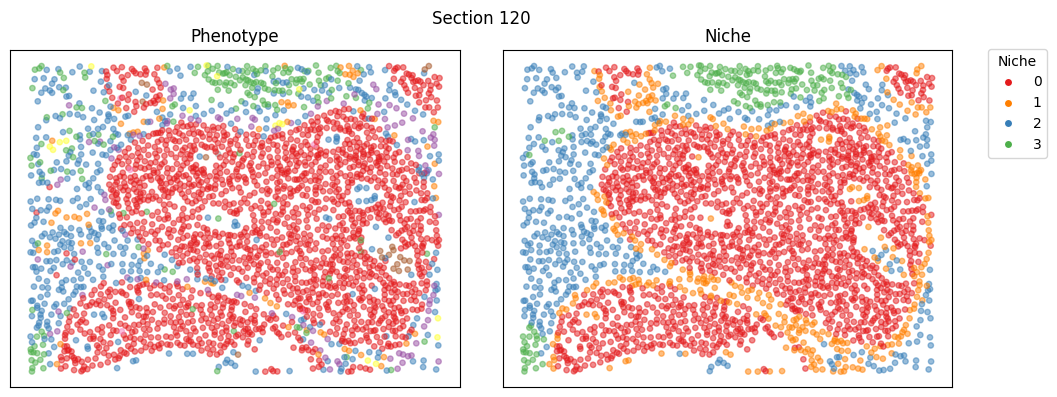

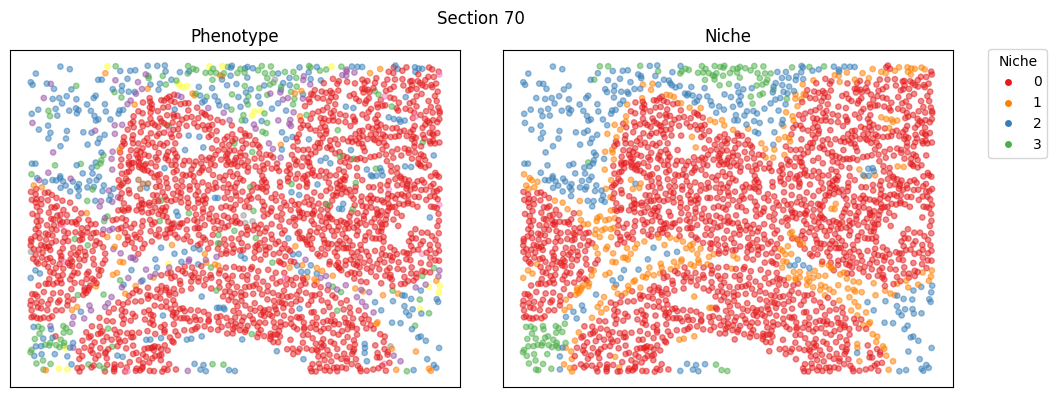

In [28]:
## Plot phenotypes & niches on image
k = 4
selection = [120,70]

niche_col = f'spatial_kmeans_{k}'
ptype_col = 'ct_broad'

for section in selection:
    df = adata2.obs.loc[ adata2.obs['z']==section, ['id','x','y'] ].copy()
    df = pd.merge(df, adata3_full.obs[['id',ptype_col,niche_col]], on='id', how='left')
    df[niche_col] = df[niche_col].astype(int)

    # Color mapping
    colors_niche = get_colors_niche(k)
    colors_phenotype = get_colors_phenotype()
    color_dicts = {
        ptype_col: colors_phenotype,
        niche_col: colors_niche }
    subplot_categories = ['Phenotype', 'Niche'] # manual titles (must match plotting order!)

    # Plot
    fig, ax = plt.subplots(1,2,figsize=(10,4), layout='tight')
    for i, cat in enumerate([ptype_col, niche_col]):
        ax[i].scatter(
            x=df['x'], y=df['y'],
            c=df[cat].map(color_dicts[cat]),
            s=15, alpha=.5)   
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        ax[i].set_title(f'{subplot_categories[i]}')
        ax[i].axes.set_aspect('equal')

    # Add legends
    fig.legend(handles=[ Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_niche[i], label=str(i)) for i in np.arange(k) ], 
                title='Niche', bbox_to_anchor=(1, .9), loc='upper left')
    plt.suptitle(f'Section {section}')

    #plt.savefig(f'../../figures/niches_cellcharter_mismatch_image_2D3Dmin_s{section}.svg', bbox_inches='tight')
    plt.show()

### Comparing all views to each other

In [ ]:
## Assess clustering similarity: ARI
ks = [3,4,5,6]

ari_2_3nb = {}
ari_3f_2 = {}
ari_3f_3nb = {}
sections = sections_2to3
for k in ks:
    results_2_3nb = np.empty(sections.size)
    results_3f_2 = np.empty(sections.size)
    results_3f_3nb = np.empty(sections.size)
    for i, section in enumerate(sections):
        # Match cells between 2D and 3D by id
        subset_2 = adata2[ adata2.obs['z']==section ].obs.set_index('id')[f'spatial_kmeans_{k}' ]
        lbl_3nb = adata3_nbrs[ adata3_nbrs.obs['section']==section ].obs.set_index('id').loc[ subset_2.index, f'spatial_kmeans_{k}' ].astype(float).values
        lbl_3f = adata3_full.obs.set_index('id').loc[ subset_2.index, f'spatial_kmeans_{k}' ].astype(float).values
        lbl_2 = subset_2.astype(float).values
        # Remove NaNs in either vector
        mask = ~np.isnan(lbl_2) & ~np.isnan(lbl_3nb) & ~np.isnan(lbl_3f)
        lbl_2 = lbl_2[ mask ].astype(int)
        lbl_3nb = lbl_3nb[ mask ].astype(int)
        lbl_3f = lbl_3f[ mask ].astype(int)
        # Calculate ARI
        results_2_3nb[i] = adjusted_rand_score(lbl_2, lbl_3nb)
        results_3f_2[i] = adjusted_rand_score(lbl_3f, lbl_2)
        results_3f_3nb[i] = adjusted_rand_score(lbl_3f, lbl_3nb)
    ari_2_3nb[k] = results_2_3nb
    ari_3f_2[k] = results_3f_2
    ari_3f_3nb[k] = results_3f_3nb

In [8]:
print('median ARI\n\t3D full vs 2D\t3D full vs nbrs\t2D vs 3D nbrs')
for k in ks:
    line = f'k = {k}:\t'
    for ari in [ari_3f_2, ari_3f_3nb, ari_2_3nb]:
        line += f'{np.median(ari[k]):.2f}\t\t'
    print(line)

median ARI
	3D full vs 2D	3D full vs nbrs	2D vs 3D nbrs
k = 3:	0.69		0.92		0.73		
k = 4:	0.76		0.94		0.77		
k = 5:	0.74		0.92		0.73		
k = 6:	0.70		0.91		0.73		


ARI of selected sections (k=4): [0.66 0.8 ]


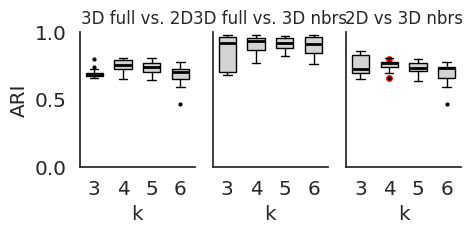

In [13]:
## ARI: 3D full vs {2D nbrs, 3D nbrs}
titles = ['3D full vs. 2D', '3D full vs. 3D nbrs', '2D vs 3D nbrs']
fig, ax = plt.subplots(1,3, figsize=(5,2.5), sharey=True, layout='tight')
for i, ari_dict in enumerate([ari_3f_2, ari_3f_3nb, ari_2_3nb]):
    ax[i].set_title(titles[i])
    for k in ks:
        ax[i].boxplot(
            ari_dict[k], patch_artist=True, positions=[k], widths=.6,
            boxprops=dict(facecolor='lightgrey', color='black'),
            medianprops=dict(color='black', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none'))
        ax[i].set_ylim(0,1)
        ax[i].tick_params(axis='both', labelsize='large')  
        ax[i].set_xlabel('k', size='large')
ax[0].set_ylabel('ARI', size='large')
sns.despine(top=True, right=True)

k = 4
selection = [120,70]
aris = ari_2_3nb[k][np.argwhere(np.isin(sections_2to3, selection)).flatten()]
print(f'ARI of selected sections (k={k}): {np.round(aris, 2)}')
ax[2].scatter(np.repeat(k, len(selection)), aris,
              s=15, c='red')
#plt.savefig('../../figures/niches_scimap_ari_allVall_boxplot.svg', bbox_inches='tight')
plt.show()

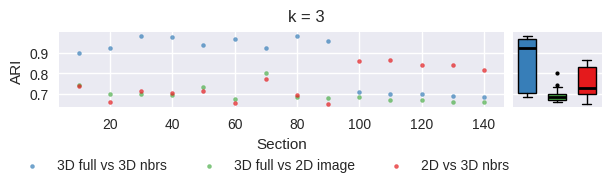

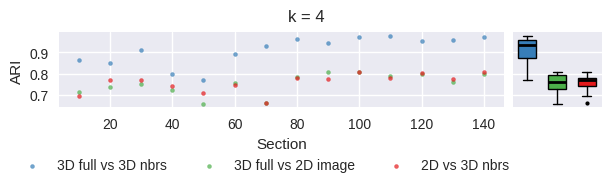

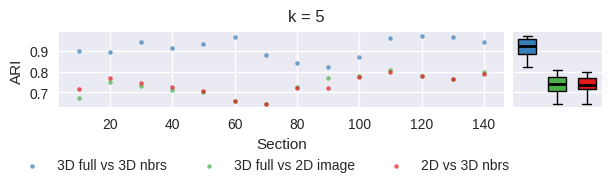

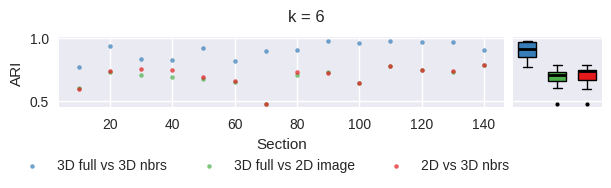

In [ ]:
## Plot ARI
colors = ['#377eb8', '#4daf4a', '#e41a1c']
labels = ['3D full vs 3D nbrs', '3D full vs 2D image', '2D vs 3D nbrs']
with plt.style.context('seaborn-v0_8'):
    for k in ks:
        fig, (ax0, ax1) = plt.subplots(1,2, figsize=(6,1.5), width_ratios=[5,1],
                               layout='constrained', sharey=True)
        fig.suptitle(f'k = {k}')
        # ARI scatter
        for i, ari in enumerate([ari_3f_3nb, ari_3f_2, ari_2_3nb]):
            ax0.scatter(sections, ari[k], label=labels[i],
                        s=8, alpha=.7, color=colors[i])
            ax1.boxplot(ari[k], patch_artist=True, positions=[i], widths=.6,
                        boxprops=dict(facecolor=colors[i], color='black'),
                        medianprops=dict(color='black', linewidth=2),
                        flierprops=dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none'))
        ax0.set_xlabel('Section')
        ax0.set_ylabel('ARI')
        ax1.set_xticks([],[])
        
        fig.legend(bbox_to_anchor=(0,-.2), loc='lower left', ncol=3)
        if k == 4:
            pass  
            #plt.savefig(f'../../figures/niches_scimap_k{k}_ari_allVsall_nbrs.svg', bbox_inches='tight')
        plt.show()

### Comparison of local views

In [ ]:
## Niche mapping
k = 4
selection = [120,70] # high ARI, low ARI
colors_niche = get_colors_niche(k)

niche_mapping = match_niches(selection, adata2, adata3_nbrs, 
                             niche_col=f'spatial_kmeans_{k}', k=k, coord_loc='obs')

In [17]:
## Fraction of misassigned cells
for section in selection:
    print(f"{niche_mapping[section]['mismatch'].sum() / niche_mapping[section].shape[0]:.2}")

0.098
0.18


In [18]:
## Proportion of misassigned cells per phenotype, compared to phenotype abundances
prop = adata3_full.obs['ct_broad'].value_counts() / adata3_full.obs.shape[0] * 100
prop = pd.DataFrame( np.round(prop.values, 1), columns=['3D_full'], index=prop.index)
for section in selection:
    df = niche_mapping[section]
    prop_section = df[ df['mismatch'] ].value_counts('phenotype') / df.mismatch.sum() * 100
    prop[ section ] = np.round( prop_section, 1 )
prop

,3D_full,120,70
ct_broad,,,
cancer cell,66.9,41.2,51.0
other,14.1,30.8,21.4
immune cell,7.1,6.5,9.3
stromal cell,5.5,10.0,10.9
myofibroblast,3.4,5.8,4.1
endothelial cell,1.5,1.2,2.3
plasma cell,0.7,4.6,0.2
epithelial cell,0.7,0.0,0.2
apoptotic cell,0.1,0.0,0.5


In [19]:
## Manual recoding -> better match of niche compositions between sections
df = niche_mapping[selection[0]]
new_mapping = {0:0,1:2,2:1,3:3}
df.niche_2D_mapped = df.niche_2D_mapped.map(new_mapping)
df.niche_3D_mapped = df.niche_3D_mapped.map(new_mapping)
niche_mapping[selection[0]] = df

df = niche_mapping[selection[1]]
new_mapping = {0:0,1:1,2:3,3:2}
df.niche_2D_mapped = df.niche_2D_mapped.map(new_mapping)
df.niche_3D_mapped = df.niche_3D_mapped.map(new_mapping)
niche_mapping[selection[1]] = df

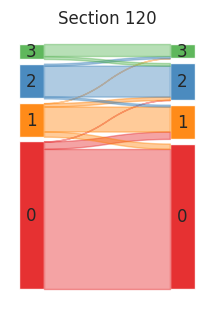

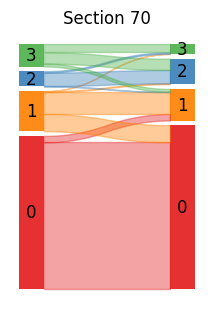

In [20]:
for section in selection:
    sankey_plot(niche_mapping[section], title=f'Section {section}',
                #savefig=f'../../figures/niches_scimap_sankey_k{k}_s{section}_nbrs.svg'
                )

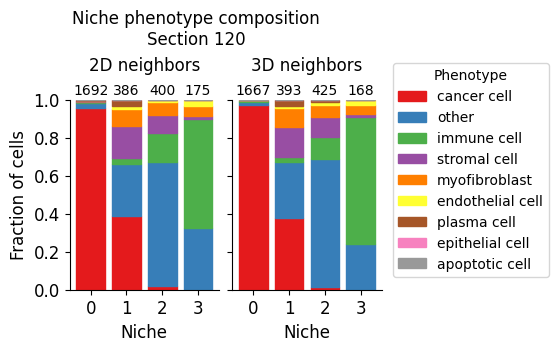

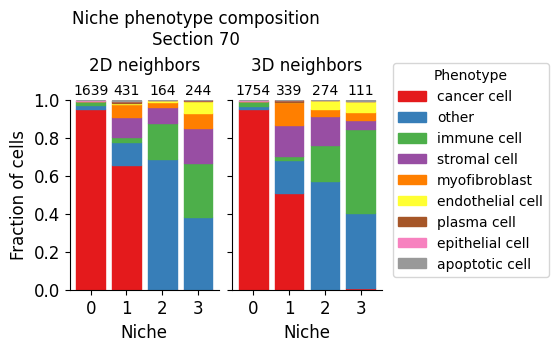

In [23]:
# Plot phenotype abundances per niche and mismatched

for section in selection:
    df = niche_mapping[section]

    # Stacked barplot: phenotypes per niche
    fig, ax = plt.subplots(1,2, figsize=(3.8,3.4), sharey=True, layout='constrained')
    pt_order = list(adata3_full.obs.value_counts('ct_broad').index)
    for i, niche in enumerate(['niche_2D_mapped', 'niche_3D_mapped']):
        niche_pt_composition_subplot(
            df[niche],
            df['phenotype'],
            ax=ax[i],
            sort_niches_by=np.arange(k),
            sort_phenotypes_by=pt_order,
            colors_phenotype=colors_phenotype)
    plt.suptitle(f'Niche phenotype composition\nSection {section}')
    ax[0].set_title('2D neighbors\n')
    ax[1].set_title('3D neighbors\n')
    ax[0].set_ylabel('Fraction of cells', size='large')
    fig.legend(handles=[ mpatches.Patch(color=colors_phenotype[i], label=str(i)) for i in colors_phenotype.keys() ], # custom legend, otherwise redundant entries,
               title='Phenotype', bbox_to_anchor=(1, .85), loc='outside left upper')
    
    #plt.savefig(f'../../figures/niches_scimap_pt_comp_k{k}_s{section}_nbrs.svg', bbox_inches='tight')
    plt.show()

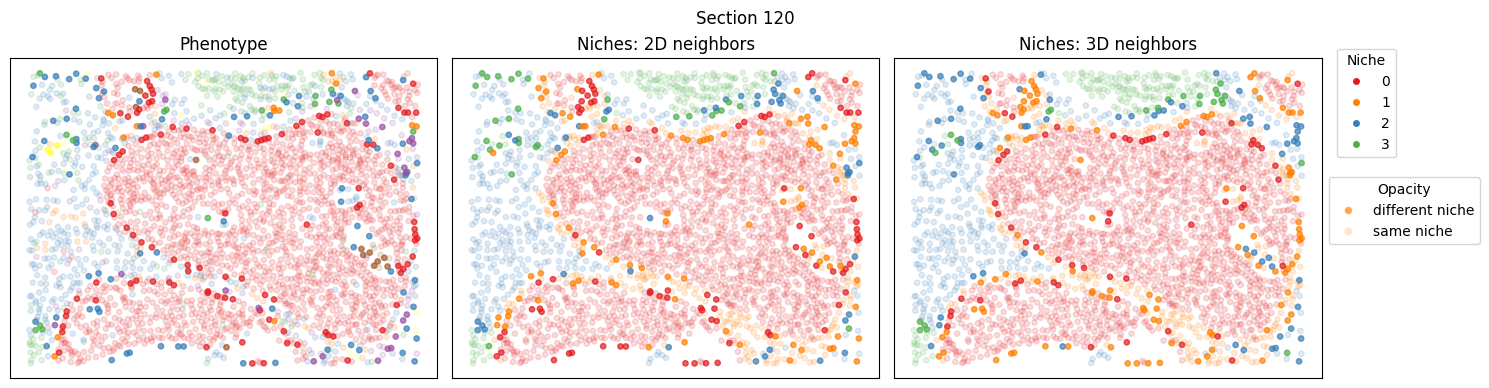

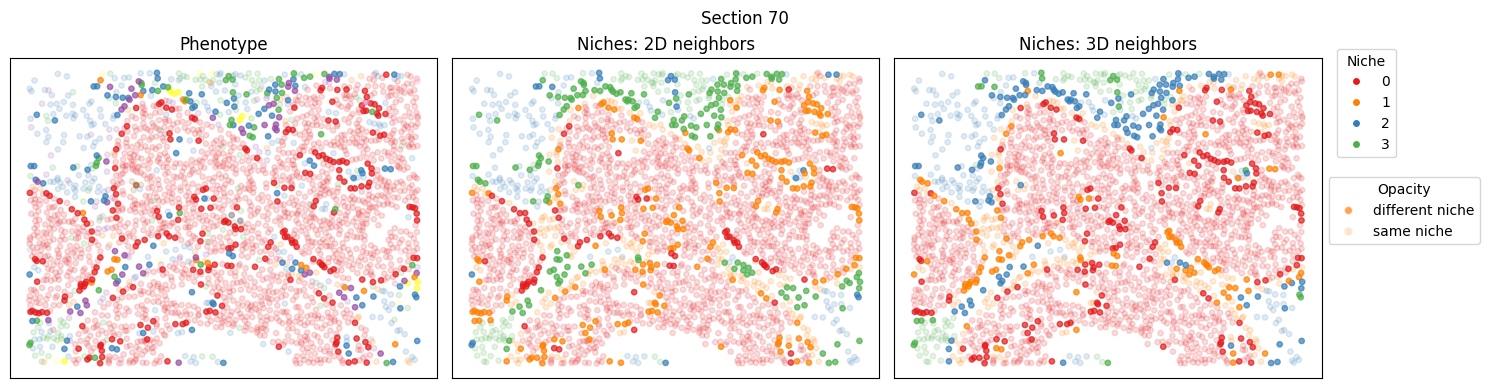

In [25]:
## Plot mismatched cells on image
from matplotlib.lines import Line2D

titles = ['Phenotype', 'Niches: 2D neighbors', 'Niches: 3D neighbors'] # manual titles (must match plotting order!)
for section in selection:
    df = niche_mapping[section]

    # Color mapping
    color_dicts = {
        'phenotype': colors_phenotype,
        'niche_2D_mapped': colors_niche,
        'niche_3D_mapped': colors_niche }

    ## Plot mismatched cells
    fig, ax = plt.subplots(1,3,figsize=(15,4), layout='tight')
    for i, cat in enumerate(['phenotype', 'niche_2D_mapped', 'niche_3D_mapped']):
        ax[i].set_title(titles[i])
        ax[i].scatter(
            x=df.loc[ ~df['mismatch'], 'x'], 
            y=df.loc[ ~df['mismatch'], 'y'],
            c=df.loc[ ~df['mismatch'], cat].map(color_dicts[cat]),
            s=15, alpha=.15,
            label = 'same niche')
        ax[i].scatter(
            x=df.loc[ df['mismatch'], 'x'], 
            y=df.loc[ df['mismatch'], 'y'],
            c=df.loc[ df['mismatch'], cat].map(color_dicts[cat]),
            s=15, alpha=.7,
            label = 'different niche')    
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        ax[i].axes.set_aspect('equal')
    
    # Add legends
    ax[2].legend(handles=[ Line2D([0], [0], marker='o', color='w', alpha=.7, markerfacecolor=colors_niche[1], label='different niche'),
                           Line2D([0], [0], marker='o', color='w', alpha=.2, markerfacecolor=colors_niche[1], label='same niche')],
                 title='Opacity', bbox_to_anchor=(1., .65))
    fig.legend(handles=[ Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_niche[i], label=str(i)) for i in np.arange(k) ], 
               title='Niche', bbox_to_anchor=(.89, .9), loc='upper left')
    plt.suptitle(f'Section {section}')

    #plt.savefig(f'../../figures/niches_scimap_mismatch_image_2D3Dmin_s{section}_nbrs.svg', bbox_inches='tight')
    plt.show()

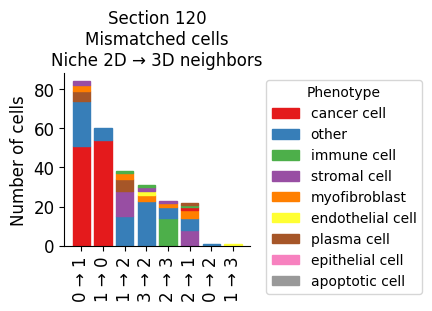

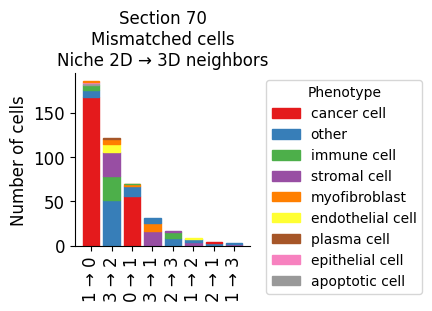

In [726]:
## Mismatched cells phenotype composition
for section in selection:
    # Get mismatched cells for niches of interest
    df = niche_mapping[section]
    total_mismatched = df[ df['mismatch']].groupby(['niche_2D_mapped','niche_3D_mapped']).size().sort_values(ascending=False).reset_index(drop=False)

    # Plot
    plt.subplots(1,1,figsize=(4.2,3), layout='constrained')
    for i, row in total_mismatched.iterrows():
        counts = df.loc[ df['mismatch'].values & (df['niche_2D_mapped']==row['niche_2D_mapped']) & (df['niche_3D_mapped']==row['niche_3D_mapped']), 'phenotype' ].value_counts()
        bottom = 0 
        for count in counts[ counts>0 ].items():
            plt.bar(i, count[1], bottom=bottom, 
                    label=count[0], color=colors_phenotype[count[0]], edgecolor=colors_phenotype[count[0]])
            bottom += count[1]
    plt.yticks(size='large')
    plt.xticks(np.arange(total_mismatched.shape[0]),
            [ f"{row['niche_2D_mapped']} → {row['niche_3D_mapped']}" for i, row in total_mismatched.iterrows() ], 
            rotation=90, size='large')
    plt.legend(handles=[ mpatches.Patch(color=colors_phenotype[i], label=str(i)) for i in colors_phenotype.keys() ], # custom legend, otherwise redundant entries
            bbox_to_anchor=(1.05, 1), title='Phenotype')
    plt.title(f'Section {section}\nMismatched cells\nNiche 2D → 3D neighbors', size='large')
    plt.ylabel('Number of cells', size='large')
    sns.despine(top=True, right=True)

    #plt.savefig(f'../../figures/niches_scimap_mismatch_barplot_2D3Dmin_s{section}_nbrs.svg', bbox_inches='tight')
    plt.show()

2D:	1	1 -> 0	0
min:	0.29	0.43	0.78
max:	0.6	0.75	1.0
median:	0.8	0.82	1.0
3D:	1	1 -> 0	0
min:	0.17	0.73	0.75
max:	0.62	0.86	0.95
median:	0.76	0.98	1.0


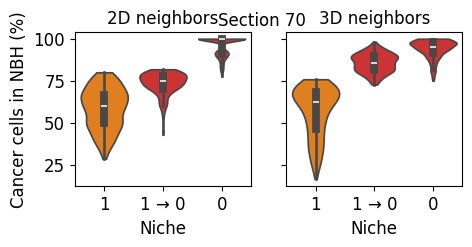

In [ ]:
## Difference in spatial_count for mismatched cells
section = selection[1]
niche0 = 1
niche1 = 0
celltype = 'cancer cell'
exclude_mm = True

# Get data for section of interest
df = niche_mapping[section]
adata2_subset = adata2[ adata2.obs['z']==section ].copy()

# Calculate phenotype composition of the neighborhood
sm.tl.spatial_count(adata2_subset, z_coordinate=None, imageid='z', **kwargs_count)

# Prepare data
adata2_subset.obs.reset_index(drop=False, inplace=True)
adata2_subset.obs.set_index('id', inplace=True)

spcount2 = adata2_subset.uns['spatial_count']
spcount3 = adata3_full.uns['spatial_count'].copy()
spcount2.index = adata2_subset.obs.index
spcount3.index = adata3_full.obs['id']
ids_mm = df[ (df['niche_2D_mapped']==niche0) & (df['niche_3D_mapped']==niche1) & (df['mismatch']) ].index

# Plot
rng = np.random.default_rng(42)
colors_niche.update({-1: colors_phenotype[celltype] }) # color for mismatched cells = phenotype color

fig, ax = plt.subplots(1,2, figsize=(5,2), sharey=True)
fig.suptitle(f'Section {section}')
for i, spcount in enumerate([spcount2, spcount3]):
    dim = '2D' if i==0 else '3D'
    ids_niche0 = df[ df['niche_2D_mapped']==niche0 ].index
    ids_niche1 = df[ df['niche_3D_mapped']==niche1 ].index
    if exclude_mm:
        ids_niche0 = ids_niche0[ ~np.isin(ids_niche0, ids_mm) ]
        ids_niche1 = ids_niche1[ ~np.isin(ids_niche1, ids_mm) ]
    distr_niche0 = spcount.loc[ ids_niche0, celltype ]
    distr_niche1 = spcount.loc[ ids_niche1, celltype ]
    distr_mm = spcount.loc[ ids_mm, celltype ]
    
    print(f'{i+2}D:\t{niche0}\t{niche0} -> {niche1}\t{niche1}')
    print(f"min:\t{distr_niche0.min():.2}\t{distr_mm.min():.2}\t{distr_niche1.min():.2}")
    print(f"max:\t{distr_niche0.median():.2}\t{distr_mm.median():.2}\t{distr_niche1.median():.2}")
    print(f"median:\t{distr_niche0.max():.2}\t{distr_mm.max():.2}\t{distr_niche1.max():.2}")
    
    sns.violinplot(pd.DataFrame({
                        'spatial_count': np.concatenate([distr_niche0 * 100,
                                                        distr_mm * 100,
                                                        distr_niche1 * 100]),
                        'niche': np.concatenate([np.repeat(niche0, len(distr_niche0)),
                                                np.repeat(-1, distr_mm.size),
                                                np.repeat(niche1, len(distr_niche1))]),
                    }),
                    x='niche', y='spatial_count', ax=ax[i], 
                    order=[niche0, -1, niche1], hue='niche', palette=colors_niche,
                    cut=0, legend=False )
    ax[i].set_xticks(np.arange(3), [niche0, f'{niche0} → {niche1}', niche1], size='large')
    ax[i].set_xlabel('Niche', size='large')
ax[0].set_title('2D neighbors')
ax[1].set_title('3D neighbors')
ax[0].tick_params(axis='y', labelsize='large')
ax[0].set_ylabel(f'{celltype.capitalize()}s in NBH (%)', size='large')

#plt.savefig(f'../../figures/niches_scimap_s{section}_mismatch_{niche0}to{niche1}_{celltype}_nbrs.svg', bbox_inches='tight')
plt.show()

## Save/load data

In [ ]:
## Filenames
fn_base = '../../data/temp/Kuett_2022_sm_niche'
fn_2 = fn_base + '_2D.zarr'
fn_3f = fn_base + '_3Df.zarr'
fn_3nbrs = fn_base + '_3Dm2.zarr'

In [ ]:
## Save
adata2.write_zarr(fn_2)
adata3_full.write_zarr(fn_3f)
adata3_nbrs.write_zarr(fn_3nbrs)

In [ ]:
## Load
adata2 = ad.read_zarr(fn_2)
adata3_full = ad.read_zarr(fn_3f)
adata3_nbrs = ad.read_zarr(fn_3nbrs)

In [ ]:
## Save environment specs
!pip freeze > ../../environment/niches_scimap.txt

0